# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
#from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [101]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_data = pd.DataFrame([{'City':'','Cloudiness':'','Country':'','Date':'','Humidity':'','Lat':'','Lng':'','Max Temp':'','Wind Speed':''}])


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [102]:
api_key = weather_api_key

for index,city in enumerate (cities):
    city_name = city 
    url = "http://api.openweathermap.org/data/2.5/weather?q="
    target_url = url + city_name + "&appid=" + api_key
    response = requests.get(target_url).json()
    try:
        print(f"Processing Record 1 of Set 1 {response['name']}")
        
        city_data.loc[index, 'City'] = response['name']
        city_data.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_data.loc[index, 'Country'] = response['sys']['country']
        city_data.loc[index, 'Date'] = response['dt']
        city_data.loc[index, 'Humidity'] = response['main']['humidity']
        city_data.loc[index, 'Lat'] = response['coord']['lat']
        city_data.loc[index, 'Lng'] = response['coord']['lon']
        city_data.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_data.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")    
        
#Processing Record 1 of Set 1 | 

Missing field/result... skipping.
Processing Record 1 of Set 1 Saint Paul Harbor
Processing Record 1 of Set 1 Albany
Missing field/result... skipping.
Processing Record 1 of Set 1 Laguna
Processing Record 1 of Set 1 George Town
Processing Record 1 of Set 1 Katsuura
Missing field/result... skipping.
Processing Record 1 of Set 1 Otane
Processing Record 1 of Set 1 Barrow
Processing Record 1 of Set 1 Otjimbingwe
Processing Record 1 of Set 1 Vaini
Processing Record 1 of Set 1 Bambous Virieux
Processing Record 1 of Set 1 Dikson
Processing Record 1 of Set 1 Paltin
Processing Record 1 of Set 1 Khatanga
Processing Record 1 of Set 1 Upernavik
Processing Record 1 of Set 1 Vaitape
Processing Record 1 of Set 1 Hilo
Processing Record 1 of Set 1 Jamestown
Processing Record 1 of Set 1 Cape Town
Processing Record 1 of Set 1 East London
Processing Record 1 of Set 1 Igarka
Processing Record 1 of Set 1 Rikitea
Processing Record 1 of Set 1 Mataura
Processing Record 1 of Set 1 Ushuaia
Processing Record 1 of

Processing Record 1 of Set 1 Saint George
Processing Record 1 of Set 1 Ojinaga
Processing Record 1 of Set 1 Bathsheba
Processing Record 1 of Set 1 Northam
Missing field/result... skipping.
Processing Record 1 of Set 1 Departamento de Maldonado
Processing Record 1 of Set 1 Kinablangan
Processing Record 1 of Set 1 Carballo
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record 1 of Set 1 Flin Flon
Processing Record 1 of Set 1 Kemijärvi
Processing Record 1 of Set 1 Quepos
Processing Record 1 of Set 1 Jiangyou
Processing Record 1 of Set 1 Kyabé
Processing Record 1 of Set 1 Ulaanbaatar
Processing Record 1 of Set 1 Fairbanks
Missing field/result... skipping.
Processing Record 1 of Set 1 Trincomalee
Processing Record 1 of Set 1 Log
Processing Record 1 of Set 1 Anzhero-Sudzhensk
Processing Record 1 of Set 1 Murray Bridge
Processing Record 1 of Set 1 Ekibastuz
Processing Record 1 of Set 1 Pisco
Missing field/result... skipping.
Pr

Processing Record 1 of Set 1 Kuusamo
Processing Record 1 of Set 1 Mufumbwe
Processing Record 1 of Set 1 Vyazemskiy
Processing Record 1 of Set 1 Ancud
Processing Record 1 of Set 1 Saint Stephen
Processing Record 1 of Set 1 Plettenberg Bay
Processing Record 1 of Set 1 Senanga
Missing field/result... skipping.
Processing Record 1 of Set 1 Sulangan
Processing Record 1 of Set 1 Karasjok
Processing Record 1 of Set 1 Severo-Kuril'sk
Processing Record 1 of Set 1 Campobello di Mazara
Processing Record 1 of Set 1 Hasilpur
Processing Record 1 of Set 1 Goderich
Processing Record 1 of Set 1 Nogales
Processing Record 1 of Set 1 Adrar
Processing Record 1 of Set 1 Jiquipilas
Processing Record 1 of Set 1 Ilulissat
Processing Record 1 of Set 1 Mataram
Processing Record 1 of Set 1 La Ronge
Processing Record 1 of Set 1 Trairi
Processing Record 1 of Set 1 Norrtälje
Processing Record 1 of Set 1 Coquimbo
Processing Record 1 of Set 1 Karacabey
Processing Record 1 of Set 1 Kanuma
Processing Record 1 of Set 1 A

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data.to_csv("Output/fileOne.csv", index=False, header=True) #writes file as csv to folder

In [117]:
nan_value = float("NaN")
city_data.replace("", nan_value, inplace=True)
city_data.dropna()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Saint Paul Harbor,90.0,US,1.583107e+09,86.0,57.79,-152.41,277.15,3.10
2,Albany,1.0,US,1.583108e+09,58.0,42.60,-73.97,273.15,2.60
4,Laguna,20.0,US,1.583108e+09,33.0,38.42,-121.42,290.15,7.20
5,George Town,20.0,MY,1.583108e+09,83.0,5.41,100.34,300.15,2.10
6,Katsuura,75.0,JP,1.583108e+09,93.0,35.13,140.30,281.48,7.70
...,...,...,...,...,...,...,...,...,...
622,Niquero,14.0,CU,1.583108e+09,62.0,20.04,-77.58,295.72,7.96
623,Mubende,97.0,UG,1.583108e+09,88.0,0.56,31.39,291.63,0.56
625,Javānrūd,79.0,IR,1.583108e+09,97.0,34.80,46.52,270.61,1.94
627,Borovskoy,91.0,KZ,1.583108e+09,89.0,53.80,64.15,269.59,5.38


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature')

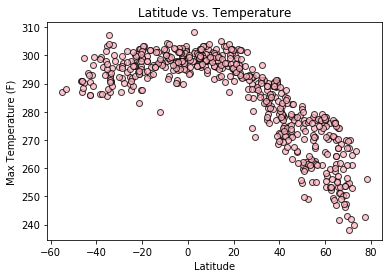

In [6]:
#sorting out df for just capomulin


#
plt.scatter(city_data['Lat'], city_data["Max Temp"], marker="o", facecolors="lightpink", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs. Temperature')

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity Plot')

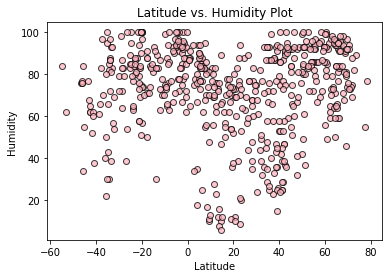

In [7]:
plt.scatter(city_data['Lat'], city_data["Humidity"], marker="o", facecolors="lightpink", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot')

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

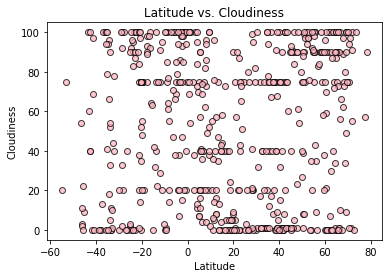

In [8]:
plt.scatter(city_data['Lat'], city_data["Cloudiness"], marker="o", facecolors="lightpink", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

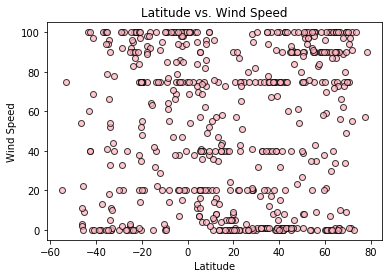

In [9]:
plt.scatter(city_data['Lat'], city_data["Cloudiness"], marker="o", facecolors="lightpink", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

## Linear Regression

In [118]:
# OPTIONAL: Create a function to create Linear Regression plots
city_data = city_data.dropna()
city_data[["Max Temp","Lng","Humidity","Cloudiness","Wind Speed"]] = city_data[["Max Temp","Lng","Humidity","Cloudiness","Wind Speed"]].astype(float)



C:\Users\amach\AppData\Local\Continuum\anaconda\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


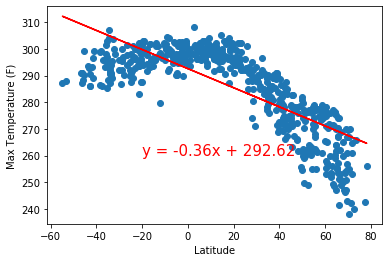

In [78]:
x_values = city_data["Lat"]
y_values = city_data["Max Temp"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-20,260), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
#printing results 
# print("The correlation coefficient is " + str(rvalue))
# print("The linear regression model is " + str(line_eq))

In [130]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df = city_data.loc[(city_data["Lat"] >= 0),:]
Southern_df = city_data.loc[(city_data["Lng"] <= 0 ),:]


City          219
Cloudiness    219
Country       219
Date          219
Humidity      219
Lat           219
Lng           219
Max Temp      219
Wind Speed    219
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

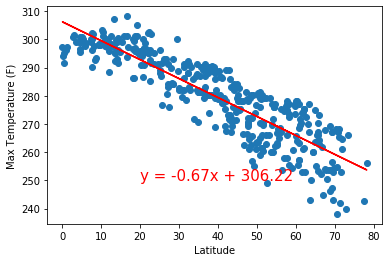

The correlation coefficient is -0.8809320955688571
The linear regression model is y = -0.67x + 306.22


In [120]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Max Temp"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,250), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

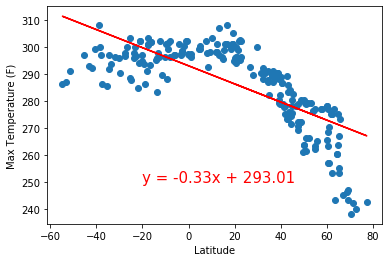

The correlation coefficient is -0.7260849922387336
The linear regression model is y = -0.33x + 293.01


In [121]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Max Temp"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-20,250), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

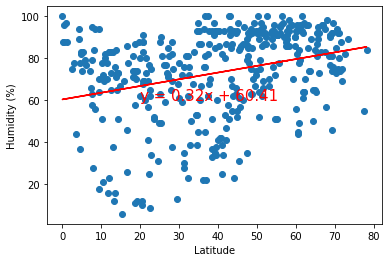

The correlation coefficient is 0.2954212022784575
The linear regression model is y = 0.32x + 60.41


In [126]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Humidity"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,60), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

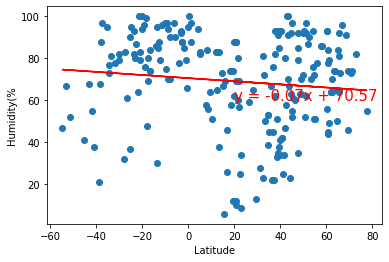

The correlation coefficient is -0.11006311696477074
The linear regression model is y = -0.07x + 70.57


In [127]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Humidity"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,60), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

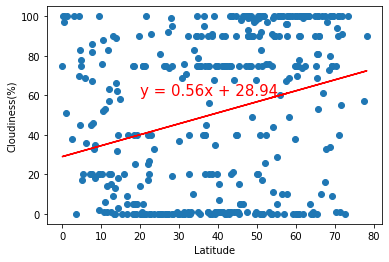

The correlation coefficient is 0.2760168904837056
The linear regression model is y = 0.56x + 28.94


In [128]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Cloudiness"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,60), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

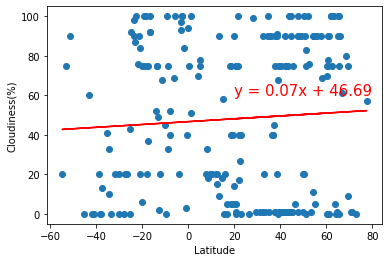

The correlation coefficient is 0.06173268104048671
The linear regression model is y = 0.07x + 46.69


In [129]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Cloudiness"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,60), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

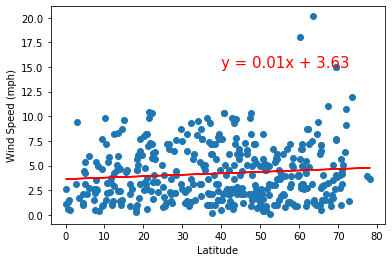

The correlation coefficient is 0.09759819846371731
The linear regression model is y = 0.01x + 3.63


In [136]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Wind Speed"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (40,15), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

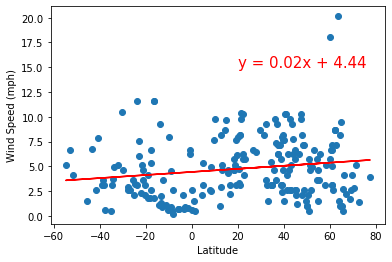

The correlation coefficient is 0.1632352013849668
The linear regression model is y = 0.02x + 4.44


In [135]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Wind Speed"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,15), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))